# Pandas 불러오기

In [2]:
import pandas as pd

## Data Type

In [3]:
# int == integer == 정수형
type(1)

int

In [4]:
# str == string == 문자열
type("Hello World!")

str

In [5]:
# float == 실수형
type(1.0)

float

In [6]:
# bool == boolean == 불리언(참/거짓)
type(True)

bool

In [7]:
True == 1

True

In [8]:
# python list type
data = [1, 3, 5, 7, 9]
print(type(data))
# Pandas Series type
data = pd.Series(data)
print(type(data))

# pandas series 안의 data type 을 보고싶다면?
data.dtypes

<class 'list'>
<class 'pandas.core.series.Series'>


dtype('int64')

In [9]:
data = [1, 3, 5, 7.0, 9]
data = pd.Series(data)
data.dtypes
# Series 안에 소수가 들어가면 전체적인 data type 이 float으로 나옴.

dtype('float64')

In [10]:
data = [1, 3, 5, 7.0, 9, 'hello']
data = pd.Series(data)
data.dtypes
# Series 안에 String이 들어가면 전체적인 data type이 object type이 됨.

dtype('O')

In [11]:
# 파이썬에서 사용할 수 있는 공학용 계산기 numpy
import numpy as np

# 결측치를 표현하는 NaN ==  Not a Number
np.nan

nan

### 리스트에 결측치가 들어가는 경우
* data type 이 float type으로 바뀜 (NaN이 float 형식)
* 문자열 하나가 추가되면 object type이 됨 -> np.nan이 추가되면 float type

In [12]:
data = [1, 3, 5, 7, 9]
data = pd.Series(data)
data.dtypes

dtype('int64')

In [13]:
data = [1, np.nan, 5, 7, 9]
data = pd.Series(data)
data.dtypes

dtype('float64')

In [14]:
# isnull() 함수를 통해 결측치를 확인할 수 있음.
data.isnull()

0    False
1     True
2    False
3    False
4    False
dtype: bool

In [15]:
# notnull() 함수를 통해 값이 있는 것만 True로 표시됨.
data.notnull()

0     True
1    False
2     True
3     True
4     True
dtype: bool

In [16]:
# 결측치 여부 확인
a = np.nan
pd.isnull(a)

True

In [17]:
# 결측치는 등호로 비교할 수 없음.
# 무조건 isnull() 함수를 적용해야 함.
print(a == np.nan)
print(np.nan == np.nan)

False
False


In [18]:
# 결측치를 아무 값으로 채워주면 통계 수치가 잘못 계산 될 수 있음.
data = [1, -1, 5, 7, 9]
data = pd.Series(data)
data.mean()

4.2

In [19]:
data = [1, np.nan, 5, 7, 9]
data = pd.Series(data)
data.mean()

5.5

### DataFrame

In [20]:
transaction_url = "https://bit.ly/dsa-transaction"
transaction = pd.read_csv(transaction_url, index_col="Name")
transaction

,date,price,state
Name,,,
Kang,2017-01-01,500,confirmed
Kim,2017-01-03,700,confirmed
Choi,2017-01-03,900,confirmed
Park,2017-01-05,800,confirmed
Lee,2017-01-07,500,canceled
Yoon,2017-01-09,700,confirmed
Jang,2017-01-09,600,canceled
Ko,2017-01-10,200,canceled


## 정렬하기

In [21]:
# index를 Name으로 지정해줬기 때문에, Name을 기준으로 알파벳 순으로 정렬됨.
transaction.sort_index()

,date,price,state
Name,,,
Choi,2017-01-03,900,confirmed
Jang,2017-01-09,600,canceled
Kang,2017-01-01,500,confirmed
Kim,2017-01-03,700,confirmed
Ko,2017-01-10,200,canceled
Lee,2017-01-07,500,canceled
Park,2017-01-05,800,confirmed
Yoon,2017-01-09,700,confirmed


In [22]:
# 알파벳 역순으로 정렬하려면 ascending = False 파라미터를 넣어주면 됨.
transaction.sort_index(ascending=False)

,date,price,state
Name,,,
Yoon,2017-01-09,700,confirmed
Park,2017-01-05,800,confirmed
Lee,2017-01-07,500,canceled
Ko,2017-01-10,200,canceled
Kim,2017-01-03,700,confirmed
Kang,2017-01-01,500,confirmed
Jang,2017-01-09,600,canceled
Choi,2017-01-03,900,confirmed


In [23]:
# sort_values() 함수는 무조건 파라미터를 넣어줘야함. by  =  "column value"
transaction.sort_values(by="price",ascending=False)

,date,price,state
Name,,,
Choi,2017-01-03,900,confirmed
Park,2017-01-05,800,confirmed
Kim,2017-01-03,700,confirmed
Yoon,2017-01-09,700,confirmed
Jang,2017-01-09,600,canceled
Kang,2017-01-01,500,confirmed
Lee,2017-01-07,500,canceled
Ko,2017-01-10,200,canceled


In [24]:
# 여러 개의 기준으로 정렬을 하고 싶다면, column value를 list 형태로 지정해주면 됨.
# ascending 또한, 리스트로 True, False를 통해 각각 지정해줄 수 있음.
transaction.sort_values(by=["date","price"],ascending=[True,False])

,date,price,state
Name,,,
Kang,2017-01-01,500,confirmed
Choi,2017-01-03,900,confirmed
Kim,2017-01-03,700,confirmed
Park,2017-01-05,800,confirmed
Lee,2017-01-07,500,canceled
Yoon,2017-01-09,700,confirmed
Jang,2017-01-09,600,canceled
Ko,2017-01-10,200,canceled


In [25]:
# 시리즈 데이터에서도 똑같이 정렬을 사용할 수 있음.
# 시리즈 형태에서는  by option을 지정해주지 않아도 됨.
transaction["date"].sort_values(ascending=False)

Name
Ko      2017-01-10
Jang    2017-01-09
Yoon    2017-01-09
Lee     2017-01-07
Park    2017-01-05
Choi    2017-01-03
Kim     2017-01-03
Kang    2017-01-01
Name: date, dtype: object

## pivot table

In [26]:
# 기본 aggregation option = average 
pd.pivot_table(transaction, index="state", values="price")

,price
state,
canceled,433.333333
confirmed,720.000000


In [27]:
# 두 개 이상의 aggregation option 가능
pd.pivot_table(transaction, index = "state", values="price",aggfunc=["mean","sum"])

,mean,sum
,price,price
state,,
canceled,433.333333,1300
confirmed,720.000000,3600


In [28]:
pd.pivot_table(transaction, index = ["date","state"], values="price",aggfunc=["mean","sum"])

mean   sum
                     price price
date       state                
2017-01-01 confirmed   500   500
2017-01-03 confirmed   800  1600
2017-01-05 confirmed   800   800
2017-01-07 canceled    500   500
2017-01-09 canceled    600   600
           confirmed   700   700
2017-01-10 canceled    200   200

## group by
* series 형태로 출력된다.

In [29]:
transaction.groupby(["date","state"])["price"].mean()

date        state    
2017-01-01  confirmed    500
2017-01-03  confirmed    800
2017-01-05  confirmed    800
2017-01-07  canceled     500
2017-01-09  canceled     600
            confirmed    700
2017-01-10  canceled     200
Name: price, dtype: int64

In [30]:
transaction.groupby(["date","state"])["price"].sum()

date        state    
2017-01-01  confirmed     500
2017-01-03  confirmed    1600
2017-01-05  confirmed     800
2017-01-07  canceled      500
2017-01-09  canceled      600
            confirmed     700
2017-01-10  canceled      200
Name: price, dtype: int64

## 같은 결과를 출력하지만 어떤게 더 효율적인가?
* 시간 비교
* group by 가 훨씬 빠름 (약 7배) - 대용량의 데이터에서는  group by 가 좋을 수 있음.
* pivot table은 여러 연산을 할 수 있지만, group by는 하나의 연산만 가능함.


In [31]:
%timeit pd.pivot_table(transaction, index="state", values="price")

3.47 ms ± 103 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [32]:
%timeit transaction.groupby(["state"])["price"].mean()

534 µs ± 4.51 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## apply

In [33]:
def is_vip(row):
    price = row["price"]
    state = row["state"]
    if price >= 500 and state =="confirmed":
        return "VIP"
    else:
        return "non-VIP"

In [34]:
row = {"price" : 500, "state":"confirmed"}
is_vip(row)

'VIP'

In [35]:
row = {"price" : 500, "state":"canceled"}
is_vip(row)

'non-VIP'

In [36]:
transaction.apply(is_vip, axis=1)

Name
Kang        VIP
Kim         VIP
Choi        VIP
Park        VIP
Lee     non-VIP
Yoon        VIP
Jang    non-VIP
Ko      non-VIP
dtype: object

## 여러개의 데이터를 하나로 합치기
* concat 함수 사용
* merge 함수 사용 ( 기준 키를 정해주지 않아도 알아서 같은 column으로 통합 )
* join
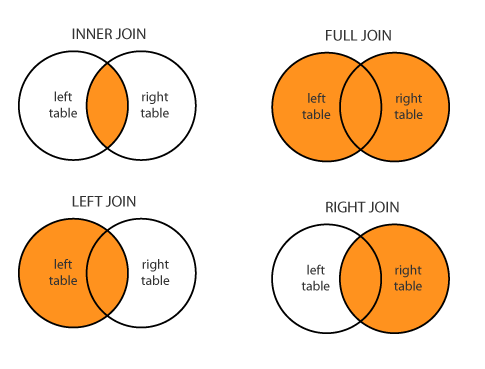

In [56]:
transaction01 = pd.read_csv("data/transaction/201701.csv")
transaction01

,Name,date,amount,product,result
0,Kang,2017-01-01,500,apple,confirmed
1,Kim,2017-01-03,700,banana,confirmed
2,Choi,2017-01-05,800,apple,confirmed
3,Park,2017-01-07,500,cereal,canceled
4,Kang,2017-01-08,1200,kiwi,confirmed
5,Choi,2017-01-09,100,melon,confirmed
6,Lee,2017-01-09,700,banana,confirmed
7,Yoon,2017-01-10,200,cereal,canceled


In [40]:
transaction02 = pd.read_csv("data/transaction/201702.csv")
transaction02

,Name,date,amount,product,result
0,Kim,2017-02-04,100,cereal,confirmed
1,Kang,2017-02-12,200,kiwi,canceled
2,Kang,2017-02-15,650,banana,confirmed
3,Park,2017-02-28,420,cereal,confirmed


In [43]:
# concat 함수 - 기준 없이 테이블 통합하기
transaction = pd.concat([transaction01, transaction02])
transaction

,Name,date,amount,product,result
0,Kang,2017-01-01,500,apple,confirmed
1,Kim,2017-01-03,700,banana,confirmed
2,Choi,2017-01-05,800,apple,confirmed
3,Park,2017-01-07,500,cereal,canceled
4,Kang,2017-01-08,1200,kiwi,confirmed
5,Choi,2017-01-09,100,melon,confirmed
6,Lee,2017-01-09,700,banana,confirmed
7,Yoon,2017-01-10,200,cereal,canceled
0,Kim,2017-02-04,100,cereal,confirmed
1,Kang,2017-02-12,200,kiwi,canceled


In [44]:
user = pd.read_csv("data/transaction/user.csv")
user

,Name,Age,Sex,Email
0,Kang,30,male,kang@gmail.com
1,Kim,22,female,kim@naver.com
2,Park,37,male,park@dsschool.co.kr
3,Lee,15,female,lee@empas.co.kr
4,Son,29,male,son@google.co.uk
5,Moon,40,female,moon@hanmail.com
6,Choi,34,male,choi@yahoo.com


In [45]:
product = pd.read_csv("data/transaction/product.csv")
product

,product,price
0,apple,5.0
1,blueberry,7.0
2,banana,2.5
3,cereal,4.5
4,kiwi,10.0
5,melon,12.5
6,pineapple,15.0


In [48]:
# 같은 column name 일 때 merge 함수를 이용한 통합
pd.merge(transaction, user)

,Name,date,amount,product,result,Age,Sex,Email
0,Kang,2017-01-01,500,apple,confirmed,30,male,kang@gmail.com
1,Kang,2017-01-08,1200,kiwi,confirmed,30,male,kang@gmail.com
2,Kang,2017-02-12,200,kiwi,canceled,30,male,kang@gmail.com
3,Kang,2017-02-15,650,banana,confirmed,30,male,kang@gmail.com
4,Kim,2017-01-03,700,banana,confirmed,22,female,kim@naver.com
5,Kim,2017-02-04,100,cereal,confirmed,22,female,kim@naver.com
6,Choi,2017-01-05,800,apple,confirmed,34,male,choi@yahoo.com
7,Choi,2017-01-09,100,melon,confirmed,34,male,choi@yahoo.com
8,Park,2017-01-07,500,cereal,canceled,37,male,park@dsschool.co.kr
9,Park,2017-02-28,420,cereal,confirmed,37,male,park@dsschool.co.kr


In [49]:
pd.merge(transaction, user, on="Name")

,Name,date,amount,product,result,Age,Sex,Email
0,Kang,2017-01-01,500,apple,confirmed,30,male,kang@gmail.com
1,Kang,2017-01-08,1200,kiwi,confirmed,30,male,kang@gmail.com
2,Kang,2017-02-12,200,kiwi,canceled,30,male,kang@gmail.com
3,Kang,2017-02-15,650,banana,confirmed,30,male,kang@gmail.com
4,Kim,2017-01-03,700,banana,confirmed,22,female,kim@naver.com
5,Kim,2017-02-04,100,cereal,confirmed,22,female,kim@naver.com
6,Choi,2017-01-05,800,apple,confirmed,34,male,choi@yahoo.com
7,Choi,2017-01-09,100,melon,confirmed,34,male,choi@yahoo.com
8,Park,2017-01-07,500,cereal,canceled,37,male,park@dsschool.co.kr
9,Park,2017-02-28,420,cereal,confirmed,37,male,park@dsschool.co.kr


In [50]:
# 두 개의 테이블을 합칠 떄, left_on 은 왼쪽 테이블의 column name,  right_on은 오른쪽 테이블의 column name
pd.merge(transaction, user, left_on="Name", right_on="Name")

,Name,date,amount,product,result,Age,Sex,Email
0,Kang,2017-01-01,500,apple,confirmed,30,male,kang@gmail.com
1,Kang,2017-01-08,1200,kiwi,confirmed,30,male,kang@gmail.com
2,Kang,2017-02-12,200,kiwi,canceled,30,male,kang@gmail.com
3,Kang,2017-02-15,650,banana,confirmed,30,male,kang@gmail.com
4,Kim,2017-01-03,700,banana,confirmed,22,female,kim@naver.com
5,Kim,2017-02-04,100,cereal,confirmed,22,female,kim@naver.com
6,Choi,2017-01-05,800,apple,confirmed,34,male,choi@yahoo.com
7,Choi,2017-01-09,100,melon,confirmed,34,male,choi@yahoo.com
8,Park,2017-01-07,500,cereal,canceled,37,male,park@dsschool.co.kr
9,Park,2017-02-28,420,cereal,confirmed,37,male,park@dsschool.co.kr


In [51]:
# inner join은 값이 있는 것만 merge함 
# left join, right join은 값이 NaN 인 것들도 join을 하게 됨
# --> 탈퇴를 했더라도 구매 이력이 있다면, 보여줌.
pd.merge(transaction, user, how="left")

,Name,date,amount,product,result,Age,Sex,Email
0,Kang,2017-01-01,500,apple,confirmed,30.0,male,kang@gmail.com
1,Kim,2017-01-03,700,banana,confirmed,22.0,female,kim@naver.com
2,Choi,2017-01-05,800,apple,confirmed,34.0,male,choi@yahoo.com
3,Park,2017-01-07,500,cereal,canceled,37.0,male,park@dsschool.co.kr
4,Kang,2017-01-08,1200,kiwi,confirmed,30.0,male,kang@gmail.com
5,Choi,2017-01-09,100,melon,confirmed,34.0,male,choi@yahoo.com
6,Lee,2017-01-09,700,banana,confirmed,15.0,female,lee@empas.co.kr
7,Yoon,2017-01-10,200,cereal,canceled,NaN,NaN,NaN
8,Kim,2017-02-04,100,cereal,confirmed,22.0,female,kim@naver.com
9,Kang,2017-02-12,200,kiwi,canceled,30.0,male,kang@gmail.com


In [53]:
# 회원가입은 했지만 구매를 하지 않은 고객을 보기 위함. 
pd.merge(transaction, user, how="right")

,Name,date,amount,product,result,Age,Sex,Email
0,Kang,2017-01-01,500.0,apple,confirmed,30,male,kang@gmail.com
1,Kang,2017-01-08,1200.0,kiwi,confirmed,30,male,kang@gmail.com
2,Kang,2017-02-12,200.0,kiwi,canceled,30,male,kang@gmail.com
3,Kang,2017-02-15,650.0,banana,confirmed,30,male,kang@gmail.com
4,Kim,2017-01-03,700.0,banana,confirmed,22,female,kim@naver.com
5,Kim,2017-02-04,100.0,cereal,confirmed,22,female,kim@naver.com
6,Choi,2017-01-05,800.0,apple,confirmed,34,male,choi@yahoo.com
7,Choi,2017-01-09,100.0,melon,confirmed,34,male,choi@yahoo.com
8,Park,2017-01-07,500.0,cereal,canceled,37,male,park@dsschool.co.kr
9,Park,2017-02-28,420.0,cereal,confirmed,37,male,park@dsschool.co.kr


In [55]:
# 구매이력이 없거나, 회원 정보가 없는 것을 모두 보여줌
pd.merge(transaction, user, how="outer")

,Name,date,amount,product,result,Age,Sex,Email
0,Kang,2017-01-01,500.0,apple,confirmed,30.0,male,kang@gmail.com
1,Kang,2017-01-08,1200.0,kiwi,confirmed,30.0,male,kang@gmail.com
2,Kang,2017-02-12,200.0,kiwi,canceled,30.0,male,kang@gmail.com
3,Kang,2017-02-15,650.0,banana,confirmed,30.0,male,kang@gmail.com
4,Kim,2017-01-03,700.0,banana,confirmed,22.0,female,kim@naver.com
5,Kim,2017-02-04,100.0,cereal,confirmed,22.0,female,kim@naver.com
6,Choi,2017-01-05,800.0,apple,confirmed,34.0,male,choi@yahoo.com
7,Choi,2017-01-09,100.0,melon,confirmed,34.0,male,choi@yahoo.com
8,Park,2017-01-07,500.0,cereal,canceled,37.0,male,park@dsschool.co.kr
9,Park,2017-02-28,420.0,cereal,confirmed,37.0,male,park@dsschool.co.kr
